爬虫程序  
建立搜索数据库之前，首先建立一个爬虫程序

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('http://www.pythonscraping.com/pages/page1.html')
page = html.read()
bs = BeautifulSoup(page,"lxml")
print(bs)

<html>
<head>
<title>A Useful Page</title>
</head>
<body>
<h1>An Interesting Title</h1>
<div>
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
</div>
</body>
</html>



In [26]:
print(bs.string)#抓取字符串

None


In [41]:
print(bs.find_all('a'))

[]


In [40]:
links = bs('sit')
links.append(['1','2'])
links.append(['3'])
for link in links:
    print(link)

['1', '2']
['3']


In [27]:
print(bs.contents)#将内容按子节点列表输出

[<html>
<head>
<title>A Useful Page</title>
</head>
<body>
<h1>An Interesting Title</h1>
<div>
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
</div>
</body>
</html>, '\n']


In [30]:
def gettextonly(soup):
        v=soup.string#抓取字符串内容按子节点列表输出
        if v==None:
            c=soup.contents#抓取内容按子节点列表输出
            resulttext = ''
            for t in c:
                #进行递归
                subtext = gettextonly(t)
                resulttext += subtext + '\n'
            return resulttext
        else:
            return v.strip()

In [31]:
sub = gettextonly(bs)
sub

'\n\nA Useful Page\n\n\n\n\nAn Interesting Title\n\nLorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.\n\n\n\n\n\n'

In [25]:
print(bs.h1)
print(page[0:50])

<h1>An Interesting Title</h1>
b'<html>\n<head>\n<title>A Useful Page</title>\n</head>'


In [15]:
import re 
url = str(bs.h1)
p = r'(?<=<h1>).+?(?=</h1>)'
partten = re.compile(p)
match = re.search(partten,url)
print(match.group(0))

An Interesting Title


In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen("http://en.wikipedia.org/wiki/Kevin_Bacon")
bsobj = BeautifulSoup(html,"lxml")

In [6]:
print(bsobj('a'))

[<a id="top"></a>, <a href="/wiki/Wikipedia:Protection_policy#semi" title="This article is semi-protected to promote compliance with the policy on biographies of living people"><img alt="Page semi-protected" data-file-height="128" data-file-width="128" height="20" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Padlock-silver.svg/20px-Padlock-silver.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Padlock-silver.svg/30px-Padlock-silver.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Padlock-silver.svg/40px-Padlock-silver.svg.png 2x" width="20"/></a>, <a href="#mw-head">navigation</a>, <a href="#p-search">search</a>, <a class="mw-disambig" href="/wiki/Kevin_Bacon_(disambiguation)" title="Kevin Bacon (disambiguation)">Kevin Bacon (disambiguation)</a>, <a class="image" href="/wiki/File:Kevin_Bacon_SDCC_2014.jpg"><img alt="Kevin Bacon SDCC 2014.jpg" data-file-height="2649" data-file-width="1907" height="306" src="//upload.wikimedia.org/wikiped

In [11]:
atag = bsobj.find_all('a')
atag[1].attrs['href']

'/wiki/Wikipedia:Protection_policy#semi'

In [14]:
page = "http://en.wikipedia.org/wiki/Kevin_Bacon"
from urllib.parse import urljoin
url = urljoin(page,atag[1].attrs['href'])
url

'http://en.wikipedia.org/wiki/Wikipedia:Protection_policy#semi'

In [19]:
gg = url.find("'")
bb = url.find("e")
print(gg)
print(bb)

-1
7


In [21]:
url = url.split("#")[0]
url

'http://en.wikipedia.org/wiki/Wikipedia:Protection_policy'

先建立一个crawler类

In [22]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import sqlite3
#需要被忽略的单词
ignorewords={'the':1,'of':1,'to':1,'and':1,'a':1,'in':1,'is':1,'it':1}

class crawlerpro(object):
    #初始化类并传入数据库名称
    def __init__(self,dbname):
        self.con = sqlite3.connect(dbname)
        
    def __del__(self):
        self.con.close()
        
    def dbcommit(self):
        self.con.commit()
    
    #创建数据库
    def createindextables(self):
        self.con.execute('create table urllit(url)')
        self.con.execute('create table wordlist(word)')
        self.con.execute('create table wordlocation(urlid,wordid,location)')
        self.con.execute('create table link(fromid integer,toid integer)')
        self.con.execute('create table linkwords(wordid,linkid)')
        self.con.execute('create index wordidx on wordlist(word)')
        self.con.execute('create index urlidx on urllist(url)')
        self.con.execute('create index wordurlidx on wordlocation(wordid)')
        self.con.execute('create index urltoidx on link(toid)')
        self.con.execute('create index urlfromidx on link(fromid)')
        self.dbcommit()
            
    #检查索引是否已经存在
    def isindexed(self,url):
        u = self.con.execute \
            ("select rowid from urllist where url = '%s'" %url).fetchone()
        if u != None:
            
            #检查它是否被检索过了
            v = self.con.execute(
                "select * from wordlocation where urlid=%d" %u[0]).fetchone()
            if v != None: return True
        return False
    
    #获取网页的内容
    def gettextonly(self,soup):
        v=soup.string#抓取字符串内容按子节点列表输出
        if v==None:
            c=soup.contents#抓取内容按子节点列表输出
            resulttext = ''
            for t in c:
                #进行递归
                subtext = self.gettextonly(t)
                resulttext += subtext + '\n'
            return resulttext
        else:
            return v.strip()
        
    #获取每个单词
    def separatewords(self,text):
        
        #将任何非字母或者非数字的字符作为分隔符
        #'\\W*' 大写表示任意的非字母和非数字，小写则表示任意的字母和数字
        splitter = re.compile('\\W*')
        #s.lower（）转化为小写字母
        return [s.lower() for s in splitter.split(text) if s!='']
    
    #获取url的id
    def getentryid(self,table,field,value,createnew=True):
        cur = self.con.execute(
            "select rowid from %s where %s='%s'" %(table,field,value))
        res = cur.fetchone()
        if res==None:
            cur = self.con.execute(
                "insert into %s (%s) values ('%s') " %(table,field,value))
            return cur.lastrowid
        else:
            return res[0]
                
    #为每个网页建立索引
    def addtoindex(self,url,soup):
        
        #检查索引是否已经存在
        if self.isindexed(url): return
        
        print('indexing'+url)
        
        #按节点获取内容
        text = self.gettextonly(soup)
        
        #划分获取每个单词
        words = self.separatewords(text)
        
        #得到URL的id
        urlid = self.getentryid('urllist','url',url)
        
        #将每个单词与该url关联
        for i in range(len(words)):
            word = words[i]
            if word in ignorewords: continue
            worid = self.getentryid('wordlist','word',word)
            self.con.execute("insert into wordlocation(urlid,wordid,location) \
                values (%d,%d,%d)" %(urlid,wordid,i))
            
    #添加一个关联两个网页的连接
    def addlinkref(self,urlFrom,urlTo,linkText):
        words = self.separatewords(linkText)
        fromid = self.getentryid('urllist','url',urlFrom)
        toid = self.getentryid('urllist','url',urlTo)
        if fromid == toid:return
        cur = self.con.execute("insert into link(fromid,toid) values(%d,%d)" %(fromid,toid))
        linkid = cur.lastrowid
        for word in words:
            if word in ignorewords:continue
            wordid = self.getentryid('wordlist','word',word)
            self.con.execute("insert into linkwords(linkid,wordid) values(%d,%d)" %(linkid,wordid))
    
    #从一小组网页开始进行广度优先搜索，直至某一给定深度
    #期间为网页建立索引
    def crawl(self,pages,depth=2):
        for i in range(depth):
            newpages = set()
            for page in pages:
                try:
                    c=urlopen(page)
                except:
                    print("could not open %s" %page)
                    continue
                soup = BeautifulSoup(c.read())
                self.addtoindex(page,soup)
                
                links = soup('a')#获取网页内的其他链接
                for link in links:
                    if ('href' in dict(link.attrs)):
                        #新的链接
                        url = urljoin(page,link['href'])
                        #判断链接末尾是否有 “’”
                        if url.find("'") != -1: continue
                        # 取“#”之前的部分，去掉位置部分
                        url = url.split('#')[0]
                        
                        if url[0:4]=='http' and not self.isindexed(url):
                            newpages.add(url)
                        linkText = self.gettextonly(link)
                        self.addlinkref(page,url,linkText)
                        
                self.dbcommit()
            pages = newpages
        

In [ ]:
pagelist = ["http://en.wikipedia.org/wiki/Kevin_Bacon"]
craeler = crawlerpro('')
craeler.crawl(pagelist)

In [1]:
import sqlite3
class crawler(object):
    def __init__(self,dbname):
        self.con=sqlite3.connect(dbname)
    def __del__(self):
        self.con.close()
    def dbcommit(self):
        self.con.commit()
    def calculatepagerank(self,iterations =20):
        # 清除当前的PageRank表
        self.con.execute('drop table if exists pagerank')
        self.con.execute('create table pagerank(urlid primary key,score)')

        #初始化每个url,令其pagerank值为1
        #init = self.con.execute('select rowid from urllist')
        self.con.execute('insert into pagerank select rowid,1.0 from urllist')
        self.dbcommit()

        for i in range(iterations):
            print("Iteration %d" %(i))
            for (urlid,) in self.con.execute('select rowid from urllist'):
                pr = 0.15

                #循环遍历指向当前网页的其他所有page
                for (linker,) in self.con.execute(
                "select distinct fromid from link where toid=%d" % urlid):

                    #得到链接源对应网页的pagerank值
                    linkingpr = self.con.execute(
                    "select score from pagerank where urlid=%d" %linker).fetchone()[0]

                    #求该链接源的指向链接总数
                    linkingcount = self.con.execute(
                    "select count(*) from link where fromid= %d" %linker).fetchone()[0]
                    pr += 0.85*(linkingpr/linkingcount)

                #记录这次循环的pr值
                self.con.execute(
                "update pagerank set score=%f where urlid=%d" %(pr,urlid))
            self.dbcommit()

In [104]:
defff= crawler('searchindex.db')
defff.calculatepagerank()

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19


查询和索引  

当我们需要搜索某些单词对应的网站时候，比如输入‘world global’则会先将搜索短语分割为单词，再在数据库中查找所有包含这两个单词的url，将结果返回给用户。这就是最最原始的搜索引擎。下面我们来提升一下这个引擎的效果。

In [2]:
import sqlite3
searcher = sqlite3.connect('searchindex.db')
searchdb = searcher.cursor()

In [3]:
values = searchdb.execute("select rowid from wordlocation where wordid=1 limit 5").fetchall()
values

[(1,), (3850,), (7042,), (7788,), (8201,)]

In [4]:
values = searchdb.execute("select * from urllist limit 5").fetchall()
values

[('http://kiwitobes.com/wiki/Categorical_list_of_programming_languages.html',),
 ('http://kiwitobes.com/wiki/Programming_language.html',),
 ('http://kiwitobes.com/wiki/Alphabetical_list_of_programming_languages.html',),
 ('http://kiwitobes.com/wiki/Timeline_of_programming_languages.html',),
 ('http://kiwitobes.com/wiki/Generational_list_of_programming_languages.html',)]

In [6]:
values = searchdb.execute("select * from wordlist limit 5").fetchall()
values

[('doctype',), ('html',), ('public',), ('w3c',), ('dtd',)]

In [7]:
values = searchdb.execute("select * from wordlocation limit 5").fetchall()
values

[(1, 1, 0), (1, 2, 1), (1, 3, 2), (1, 4, 3), (1, 5, 4)]

In [8]:
values = searchdb.execute("select * from link limit 5").fetchall()
values

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6)]

In [25]:
values = searchdb.execute("select * from linkwords limit 5").fetchall()
values

[(19, 1), (20, 1), (112, 2), (113, 3), (114, 4)]

In [26]:
values = searchdb.execute("select w0.urlid,w0.location,w1.location \
                            from wordlocation w0,wordlocation w1 \
                            where w0.urlid = w1.urlid \
                            and w0.wordid = 10 \
                            and w1.wordid = 17").fetchall()
values

[(1, 9, 20),
 (1, 9, 159),
 (1, 9, 240),
 (1, 9, 273),
 (1, 146, 20),
 (1, 146, 159),
 (1, 146, 240),
 (1, 146, 273),
 (1, 175, 20),
 (1, 175, 159),
 (1, 175, 240),
 (1, 175, 273),
 (1, 178, 20),
 (1, 178, 159),
 (1, 178, 240),
 (1, 178, 273),
 (1, 4077, 20),
 (1, 4077, 159),
 (1, 4077, 240),
 (1, 4077, 273),
 (123, 9, 399),
 (123, 9, 2000),
 (123, 143, 399),
 (123, 143, 2000),
 (123, 169, 399),
 (123, 169, 2000),
 (123, 172, 399),
 (123, 172, 2000),
 (123, 2334, 399),
 (123, 2334, 2000),
 (340, 9, 396),
 (340, 9, 1997),
 (340, 143, 396),
 (340, 143, 1997),
 (340, 169, 396),
 (340, 169, 1997),
 (340, 172, 396),
 (340, 172, 1997),
 (340, 2331, 396),
 (340, 2331, 1997),
 (5, 9, 302),
 (5, 146, 302),
 (5, 175, 302),
 (5, 178, 302),
 (5, 644, 302),
 (4, 9, 273),
 (4, 145, 273),
 (4, 173, 273),
 (4, 176, 273),
 (4, 2055, 273),
 (3, 9, 287),
 (3, 9, 1201),
 (3, 146, 287),
 (3, 146, 1201),
 (3, 175, 287),
 (3, 175, 1201),
 (3, 178, 287),
 (3, 178, 1201),
 (3, 1266, 287),
 (3, 1266, 1201),
 (1

现在有了文档，接下来准备搜索引擎的搜索部分了

函数为列表中的每个单词建立一个指向wordlocation表的引用，因此，一个涉及两个单词（对应ID为10和17）的查询如下所示：

In [116]:
class searcher:
    def __init__(self,dbname):
        self.con = sqlite3.connect(dbname)
        
    def __del__(self):
        self.con.close()
        
    def getmatchrows(self,q):
        #构造查询字符串
        fieldlist = 'w0.urlid'
        tablelist = ''
        clauselist = ''
        wordids = []
        
        #根据空格拆分单词
        words = q.split(' ')
        tablenumber = 0
        
        for word in words:
            #获取单词的ID
            wordrow = self.con.execute(
                "select rowid from wordlist where word='%s'" %word).fetchone()
            if wordrow != None:
                wordid = wordrow[0]
                wordids.append(wordid)
                if tablenumber>0:
                    tablelist += ','
                    clauselist += ' and '
                    clauselist += 'w%d.urlid = w%d.urlid and ' %(tablenumber-1,tablenumber)
                fieldlist += ',w%d.location' % tablenumber
                tablelist += 'wordlocation w%d' %tablenumber
                clauselist += 'w%d.wordid=%d' %(tablenumber,wordid)
                tablenumber += 1
        #根据各个组分，建立查询
        fullquery = 'select %s from %s where %s' %(fieldlist,tablelist,clauselist)
        cur = self.con.execute(fullquery)
        rows = [row for row in cur]
        
        return rows,wordids
    
    def getscoredlist(self,rows,wordids):
        totalscores = dict([(row[0],0) for row in rows])

        #评价函数
        weights = [#1单词频度使用
                 (1.0,self.frequencyscore(rows)),
                    #2文档位置使用
                    (1.0,self.locationscore(rows)),
                     (1.0,self.pagerankscore(rows)),
                    (1.0,self.inboundlinkscore(rows))]
        
        for (weight,scores) in weights:
            for url in totalscores:
                totalscores[url] += weight*scores[url]
        return totalscores

    def geturlname(self,id):
        return self.con.execute(
        "select url from urllist where rowid = %d" % id).fetchone()[0]

    def query(self,q):
        rows,wordids = self.getmatchrows(q)
        scores = self.getscoredlist(rows,wordids)
        rankedscores = sorted([(score,url) for (url,score) in scores.items()],reverse=1)
        for (score,urlid) in rankedscores[0:10]:
            print ('%f\t%s' %(score,self.geturlname(urlid)))
            
    def frequencyscore(self,rows):
        counts = dict([(row[0],0) for row in rows])
        for row in rows:counts[row[0]] += 1
        return self.normalizescores(counts)
    
    def normalizescores(self,scores,smallIsBetter=0):
        vsmall = 0.00001#避免被零整除
        if smallIsBetter:
            minscore = min(scores.values())
            return dict([(u,float(minscore)/max(vsmall,L)) for (u,L) \
                        in scores.items()])
        else:
            maxscore = max(scores.values())
            if maxscore == 0: maxscore = vsmall
            return dict([(u,float(c)/maxscore) for (u,c) in scores.items()])
        
    def locationscore(self,rows):
        locations = dict([(row[0],1000000) for row in rows])
        for row in rows:
            loc = sum(row[1:])
            if loc < locations[row[0]]: locations[row[0]]=loc
        return self.normalizescores(locations,smallIsBetter=1)
    
    def pagerankscore(self,rows):
        pageranks = dict([(row[0],self.con.execute('select score from pagerank where \
        urlid=%d' %row[0]).fetchone()[0]) for row in rows])
        maxrank = max(pageranks.values())
        normalizedscores = dict([(u,float(L)/maxrank) for (u,L) in pageranks.items()])
        return normalizedscores
    
    def inboundlinkscore(self,rows):
        uniqueurls = set([row[0] for row in rows])
        inboundcount = dict([(u,self.con.execute('select count(*) from link \
        where toid = %d' %u).fetchone()[0]) for u in uniqueurls])
        return self.normalizescores(inboundcount)

In [32]:
values = searchdb.execute("select w0.urlid,w0.location,w1.location \
                            from wordlocation w0,wordlocation w1 \
                            where w0.urlid = w1.urlid \
                            and w0.wordid = 10 \
                            and w1.wordid = 17").fetchall()

In [33]:
e = searcher('searchindex.db')
e.getmatchrows('functional programming')

([(1, 327, 23),
  (1, 327, 162),
  (1, 327, 243),
  (1, 327, 261),
  (1, 327, 269),
  (1, 327, 436),
  (1, 327, 953),
  (1, 327, 1123),
  (1, 327, 1159),
  (1, 327, 1172),
  (1, 327, 1230),
  (1, 327, 1240),
  (1, 327, 1258),
  (1, 327, 1304),
  (1, 327, 1346),
  (1, 327, 1351),
  (1, 327, 1407),
  (1, 327, 1410),
  (1, 327, 1603),
  (1, 327, 1668),
  (1, 327, 1681),
  (1, 327, 1687),
  (1, 327, 1690),
  (1, 327, 1715),
  (1, 327, 1745),
  (1, 327, 1778),
  (1, 327, 1857),
  (1, 327, 1897),
  (1, 327, 1927),
  (1, 327, 1949),
  (1, 327, 2042),
  (1, 327, 2109),
  (1, 327, 2119),
  (1, 327, 2151),
  (1, 327, 2386),
  (1, 327, 2453),
  (1, 327, 2464),
  (1, 327, 2656),
  (1, 327, 2761),
  (1, 327, 2766),
  (1, 327, 2800),
  (1, 327, 2855),
  (1, 327, 2995),
  (1, 327, 3096),
  (1, 327, 3172),
  (1, 327, 3440),
  (1, 327, 3450),
  (1, 327, 3465),
  (1, 327, 3770),
  (1, 327, 3801),
  (1, 327, 3804),
  (1, 327, 3809),
  (1, 327, 3885),
  (1, 327, 3888),
  (1, 327, 4041),
  (1, 327, 4089),


基于内容的排名

如何在返回的大量网页中，找出真正和查询匹配的页面。这需要我们找到一种能够针对给定查询条件为网页进行评价的方法，并且在返回结果中将评价最高的排列在前面。

单词频度

最简单的思想，搜索的单词在网页中出现频率较高，则也有可能是我们要的页面。遗憾的是现实往往没这么简单。  


In [51]:
def getscoredlist(self,rows,wordids):
    totalscores = dict([(row[0],0) for row in rows])
    
    #评价函数
    
    #1单词频度使用
    #weights = [(1.0,self.frequencyseore(rows))]
    
    #2文档位置使用
    weights = [(1.0,self.locationscore(rows))]
    
    for (weight,scores) in weights:
        for url in totalscores:
            totalscores[url] += weight*scores[url]
    return totalscores

def geturlname(self,id):
    return self.con.execute(
    "select url from urllist where rowid = %d" % id).fetchone()[0]

def query(self,q):
    rows,wordids = self.getmatchrows(q)
    scores = self.getscoredlist(rows,wordids)
    rankedscores = sorted([(score,url) for (url,score) in scores.items()],reverse=1)
    for (score,urlid) in rankedscores[0:10]:
        print ('%f\t%s' %(score,self.geturlname(urlid)))
            

In [ ]:
在没有对结果评价的情况下输出的结果

In [37]:
e =searcher('searchindex.db')
e.query('functional programming')

0.000000	http://kiwitobes.com/wiki/XSLT.html
0.000000	http://kiwitobes.com/wiki/XQuery.html
0.000000	http://kiwitobes.com/wiki/Unified_Modeling_Language.html
0.000000	http://kiwitobes.com/wiki/SNOBOL.html
0.000000	http://kiwitobes.com/wiki/Procedural_programming.html
0.000000	http://kiwitobes.com/wiki/Miranda_programming_language.html
0.000000	http://kiwitobes.com/wiki/ISWIM.html
0.000000	http://kiwitobes.com/wiki/Smalltalk_programming_language.html
0.000000	http://kiwitobes.com/wiki/Self_programming_language.html
0.000000	http://kiwitobes.com/wiki/MOO_programming_language.html


归一化函数  
令评价方法具有相同的值域和变化方向

In [38]:
def normalizescores(self,scores,smallIsBetter=0):
    vsmall = 0.00001#避免被零整除
    if smallIsBetter:
        minscore = min(scores.values())
        return dict([(u,float(minscore)/max(vsmall,L)) for (u,L) \
                    in scores.items()])
    else:
        maxscore = max(scores.values())
        if maxscore == 0: maxscore = vsmall
        return dict([(u,float(c)/maxscore) for (u,c) in scores.items()])

单词频度

In [45]:
def frequencyscore(self,rows):
    counts = dict([(row[0],0) for row in rows])
    for row in rows:counts[row[0]] += 1
    return self.normalizescores(counts)

In [49]:
e =searcher('searchindex.db')
e.query('functional programming')

1.000000	http://kiwitobes.com/wiki/Functional_programming.html
0.262476	http://kiwitobes.com/wiki/Categorical_list_of_programming_languages.html
0.062310	http://kiwitobes.com/wiki/Programming_language.html
0.043976	http://kiwitobes.com/wiki/Lisp_programming_language.html
0.036394	http://kiwitobes.com/wiki/Programming_paradigm.html
0.030880	http://kiwitobes.com/wiki/Multi-paradigm_programming_language.html
0.027295	http://kiwitobes.com/wiki/Perl.html
0.022057	http://kiwitobes.com/wiki/Declarative_programming.html
0.020265	http://kiwitobes.com/wiki/Generic_programming.html
0.019024	http://kiwitobes.com/wiki/Object-oriented_programming.html


上述返回结果将涉及“functional programming”的网页放在了前面

文档位置  

文档的主题有可能会出现在靠近文档的开始处，统计单词在文档中出现的位置信息，位置越往前的就越有可能是我们想要的结果。同样这也图样图森破。

In [50]:
def locationscore(self,rows):
    locations = dict([(row[0],1000000) for row in rows])
    for row in rows:
        loc = sum(row[1:])
        if loc < locations[row[0]]: locations[row[0]]=loc
    return self.normalizescores(locations,smallIsBetter=1)
        

In [52]:
e =searcher('searchindex.db')
e.query('functional programming')

1.000000	http://kiwitobes.com/wiki/Functional_programming.html
0.262476	http://kiwitobes.com/wiki/Categorical_list_of_programming_languages.html
0.062310	http://kiwitobes.com/wiki/Programming_language.html
0.043976	http://kiwitobes.com/wiki/Lisp_programming_language.html
0.036394	http://kiwitobes.com/wiki/Programming_paradigm.html
0.030880	http://kiwitobes.com/wiki/Multi-paradigm_programming_language.html
0.027295	http://kiwitobes.com/wiki/Perl.html
0.022057	http://kiwitobes.com/wiki/Declarative_programming.html
0.020265	http://kiwitobes.com/wiki/Generic_programming.html
0.019024	http://kiwitobes.com/wiki/Object-oriented_programming.html


In [ ]:
“functional programming”的网页依然放在了最前面

单词距离

如果查询条件中有多个单词，则他们在文档中出现的位置应该很靠近。注意这里不是靠近，而是靠前。同样然并卵的一条规则。

以上规则，早期的搜索引擎的确就是这么干的。所以我们也需要用这几条规则来练练手，涉及有数据库，数据归一化以及程序设计的知识。书上的例子还是很不错的。只是我选择了cnn的网站作为实验对象，例子中的网站打不开。最重要的是体会到数据库还是很重要的，要好好学。 
书中对单词距离判断那里过于简单了，直接在查询单词组中用相邻两个最近单词的距离来评价一个url，这很不科学，但作为例子而已，这点没必要太深究。

利用外部回指链接  

以上是基于网页内容的评价度。现在我们提高一点逼格。通过考察外界就该网页所提供的信息–尤其是哪个页面链向了改网页，以及他们对该网页的评价，来进一步改善搜索结果。
  
简单计数  

处理外部回指链接最为简单的做法，就是在每个网页上统计链接的数目，并将该链接总数所为针对网页的度量。回到刚才数据库关系图：   

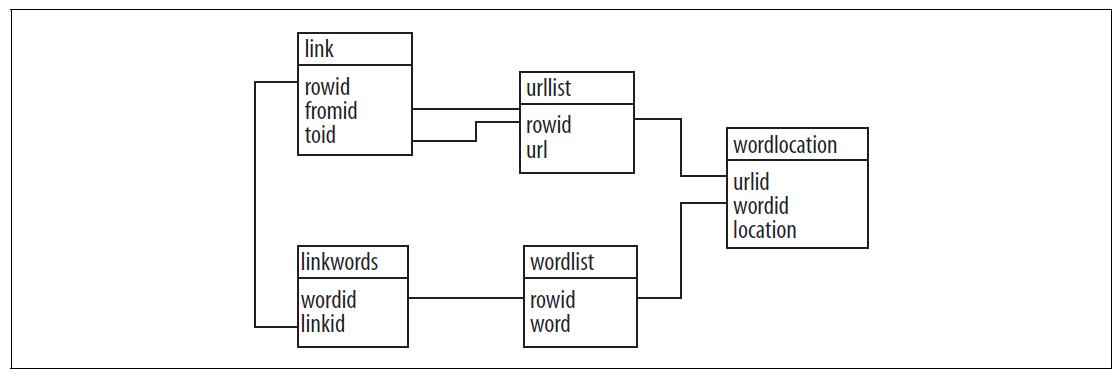

表link中保存了爬取到的资源中url的指向关系。比如url1的页面中有url2的链接，则(fromid:url1,toid:url2). 
通过这个关系，我们可以在表中查询所有toid=指定url的记录，并计数。这个计数值就是这个url对应网页的评价度，再计算所有的url，并归一化，排个序就行。

In [53]:
def inboundlinkscore(self,rows):
    uniqueurls = set([row[0] for row in rows])
    inboundcount = dict([(u,self.con.execute(
        "select count(*) from link where toid = %d" %u).fetchone()[0]) \
                        for u in uniqueurls])
    return self.normalizescores(inboundcount)

PageRank算法

PageRank是有Google创始人发明的，并以发明者之一的Larry Page命名。现在基于这种变体已被所有大型搜索引擎采用。该算法认为网页的重要性是依据指向该网页的所有其他网页的重要性，以及这些网页中包含的链接数求得的。没错这个算法就是来评价网页重要性的。这个算法和其它算法（比如计入内容的算法加权求和得到的评价结果能改进引擎的效果）。 

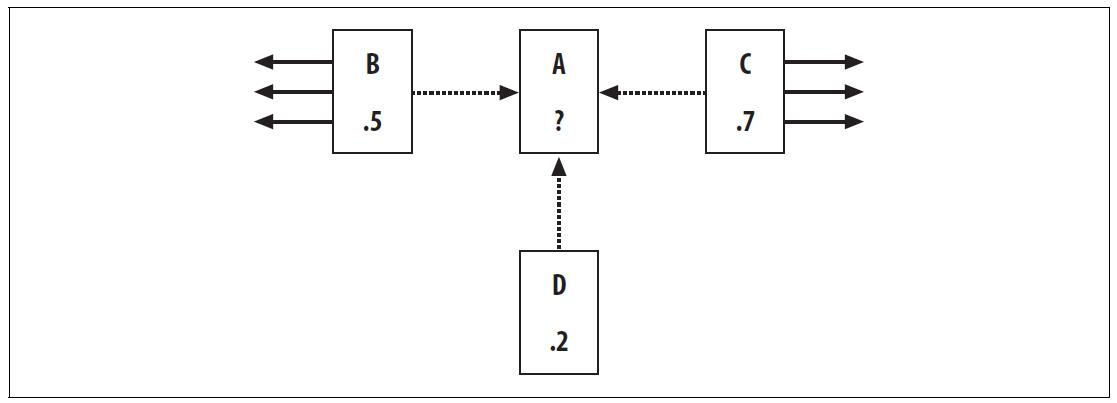

上图中，网页B，C和D均指向A，它们的PageRank值已经计算得出。B还指出另外三个网页，而C则指向其他四个网页，D只指向A。为了得到A的PageRank值，我们将指向A的每个网页的PageRank(pr)值除以这些网页中的链接总数，然后乘以阻尼因子0.85，再加上一个0.15的最小值。PR(A)的计算公式如下： 

pr(A) = 0.15 + 0.85*(pr(B)/links(B)+pr(c)/links(C) + pr(D)/links(D))  
      =0.15 + 0.85*(0.5/4 + 0.7/5 + 0.2/1)

我们发现，由于D指向A，而且能贡献出它的全部分值，所以相比B或者C，尽管D本身的PageRank值较低，但是是加上它对A的PageRank值贡献度更大。本例中所有指向A的网页都已有了PageRank值。只有知道了指向同一网页的所有其他网页的评价后，我们才算出该网页的评价值。同样，对于这些网页的所哟其他网页，如果不先计算它们的评价值，那么这些网页的pagerank也是无法计算的。如何对一组还没有pagerank值得网页进行pangrank计算呢？ 
解决方法是，为所有PageRank都设置一个任意的初始值，然后反复计算，迭代若干次。在每次迭代中，每个网页的PageRank值将会越来越接近真实值。迭代所需要次数要视网络数量而定，不过对于目前正在处理的这一小组网页，20次就足够了。 

In [54]:
def calculatepagerank(self,iterations =20):
    # 清除当前的PageRank表
    self.con.execute('drop table if exists pagerank')
    self.con.execute('create table pagerank(urlid primary key,score)')
    
    #初始化每个url,令其pagerank值为1
    self.con.execute('insert into pagerank select rowid,1.0 from urllist')
    self.dbcommit()
    
    for i in range(iterations):
        print("Iteration %d" %(i))
        for (urlid,) in self.con.execute('select rowid from urllist'):
            pr = 0.15
            
            #循环遍历指向当前网页的其他所有page
            for (linker,) in self.con.execute(
            "select distinct formid from link where toid=%d" % urlid):
                
                #得到链接源对应网页的pagerank值
                linkingpr = self.con.execute(
                "select score from pagerank where urlid=%d" %linker).fetchone()[0]
                
                #求该链接源的指向链接总数
                linkingcount = self.con.execute(
                "select count(*) from link where fromid= %d" %linker).fetchone()[0]
                pr += 0.85*(linkingpr/linkingcount)
                
            #记录这次循环的pr值
            self.con.execute(
            "update pagerank set score=%f where urlid=%d" %(pr,urlid))
        self.dbcommit()
                

In [ ]:
defff= crawler('searchindex.db')
defff.calculatepagerank()

In [108]:
cur = defff.con.execute("select * from pagerank order by score desc limit 5").fetchall()
cur

[(438, 2.528516),
 (2, 1.161464),
 (543, 1.064252),
 (104, 0.542686),
 (117, 0.496406)]

In [109]:
e.geturlname(438)

'http://kiwitobes.com/wiki/Main_Page.html'

这个网页最高一点都不奇怪，因为其他的每一个网页都指向这个网页。  
接下来将评价值归一化。

In [110]:
def pagerankscore(self,rows):
    pageranks = dict([(row[0],self.con.execute('select score from pagerank where \
    urlid=%d' %row[0]).fetchone()[0]) for row in rows])
    maxrank = max(pageranks.values())
    normalizedscores = dict([(u,float(L)/maxrank) for (u,L) in pageranks.items()])
    return normalizedscores

In [114]:
e =searcher('searchindex.db')
e.query('functional programming')

2.318146	http://kiwitobes.com/wiki/Functional_programming.html
1.074506	http://kiwitobes.com/wiki/Programming_language.html
0.517633	http://kiwitobes.com/wiki/Categorical_list_of_programming_languages.html
0.439568	http://kiwitobes.com/wiki/Programming_paradigm.html
0.426817	http://kiwitobes.com/wiki/Lisp_programming_language.html
0.400361	http://kiwitobes.com/wiki/Object-oriented_programming.html
0.400066	http://kiwitobes.com/wiki/Haskell_programming_language.html
0.368118	http://kiwitobes.com/wiki/Multi-paradigm_programming_language.html
0.358329	http://kiwitobes.com/wiki/Scheme_programming_language.html
0.336089	http://kiwitobes.com/wiki/Procedural_programming.html


利用链接文本

另一种对搜索结果进行排名的方法，是根据指向某一网页的链接文本来决定网页的相关程度。大多数时候，相比于被链接的网页自身所提供的信息而言，我们从指向该网页的链接中得到信息会更有价值。因为针对其所指的链接，网页上都会提供一些解释其内容的简短描述，如下图 
代码如下：

In [115]:
def inboundlinkscore(self,rows):
    uniqueurls = set([row[0] for row in rows])
    inboundcount = dict([(u,self.con.execute('select count(*) from link \
    where toid = %d' %u).fetchone()[0]) for u in uniqueurls])
    return self.normalizescores(inboundcount)

In [117]:
e =searcher('searchindex.db')
e.query('functional programming')

2.694336	http://kiwitobes.com/wiki/Functional_programming.html
2.074506	http://kiwitobes.com/wiki/Programming_language.html
0.919408	http://kiwitobes.com/wiki/Object-oriented_programming.html
0.777664	http://kiwitobes.com/wiki/Programming_paradigm.html
0.747065	http://kiwitobes.com/wiki/Unix.html
0.722055	http://kiwitobes.com/wiki/Lisp_programming_language.html
0.627972	http://kiwitobes.com/wiki/Python_programming_language.html
0.585780	http://kiwitobes.com/wiki/Haskell_programming_language.html
0.582841	http://kiwitobes.com/wiki/Perl.html
0.575952	http://kiwitobes.com/wiki/Assembly_language.html


 现在我们计算出了网站的各种评价度，只要对它们加权求和就能得到不同的效果，其中一些应该就是我们想要的结果。
从点击行为中学习

在线应用的一个最大优势就在于，它们会持续受到以用户行为为表现形式的反馈信息。对于搜索引擎而言，每一位用户可以通过只点击某条结果，而不选择点击其它内容，向引擎及时提供有关他对搜索结果喜好程度的信息。 
为了实现这一目的，我们将构建一个人工神经网络，向其提供：查询条件中的单词，返回给用户的搜索结果，以及用户的点击决策，然后再对其加以训练。一旦网络经过了许多不同的点击训练，我们就可以利用它来改进搜索结果的排序，以更好的反映用户在过去一段时间内的实际点击情况。 
书中对于神经网络的科普以及数据库设计等基础，就不讲了，重点看这个神经网络是怎么设计，并能在线训练的。 
这个神经网络结构如下 

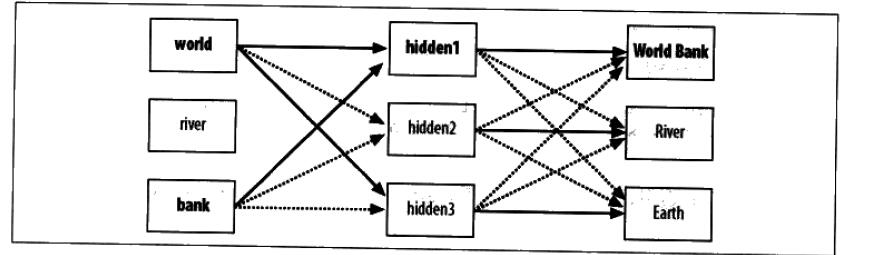

                                                   神经网络对”World Bank”所做出的反应        

 上图，给出了一个针对“world bank”的查询。途中的实线代表强链接，粗体文字表示节点已经变得非常活跃。当然，最终的结果还要取决于被不断迭代修正的链接强度（也就是链接权重）。为此，只有有人执行搜索，并从结果中选择链接，我们就对该网络进行训练。在上图的网络中，许多人对world bank字符串进行搜索，并点击了world bank的链接，加强了单词与URL的关联。   
    
神经网络设计   

结构：    


简单三成结构，input，hidden，output。而且本例中不是先预先创建一个隐藏层有几千个节点，全部链接均已就绪的巨大网络，我们只在需要时候创建新的隐藏节点会更加搞笑，更加简单。每传入一组以前从未见过的单词组合，该网络的构建函数就会在隐藏层中建立一个新的节点。随后函数会为单词与隐藏节点之间，以及查询节点与查询所返回的URL结果之间，建立其具有默认权重的链接。随着查询的增多，这个网络也会很大，输入层隐藏层以及输出层之间的链接将会变得非常复杂。

In [1]:
from math import tanh
import sqlite3
class searchnet(object):
    def __init__(self,dbname):
        self.con = sqlite3.connect(dbname)
        
    def __del__(self):
        self.con.close()
        
    def droptables(self):
        self.con.execute('drop table if exists hiddennode')
        self.con.execute('drop table if exists wordhidden')
        self.con.execute('drop table if exists hiddenurl')
        
    def maketables(self):
        self.con.execute("create table hiddennode(create_key)")
        self.con.execute("create table wordhidden(fromid,toid,strength)")
        self.con.execute("create table hiddenurl(fromid,toid,strength)")
        self.con.commit()
    
    def getstrength(self,fromid,toid,layer):
        if layer == 0: table="wordhidden"
        else:table = "hiddenurl"
        res = self.con.execute("select strength from %s where fromid=%d and toid=%d" %(table,fromid,toid)).fetchone()
        #单词层的默认值是-0.2，链接层的默认值是0
        if res==None:
            if layer==0: return -0.2
            if layer==1: return 0
        return res[0]
    
    def setstrength(self,fromid,toid,layer,strength):
        if layer==0: table = "wordhidden"
        else: table = "hiddenurl"
        res = self.con.execute("select rowid from %s where fromid=%d and toid = %d" %(table,fromid,toid)).fetchone()
        if res==None:
            self.con.execute("insert into %s(fromid,toid,strength) values(%d,%d,%f)" %(table,fromid,toid,strength))
        else:
            rowid = res[0]
            self.con.execute("update %s set strength=%f where rowid=%d" %(table,strength,rowid))

    
        
    def generatehiddennode(self,wordids,urls):
        if len(wordids) > 3: return None
        #检查我们是否已经为这组单词建好了一个节点
        createkey = '_'.join(sorted([str(wi) for wi in wordids]))
        res = self.con.execute(
        "select rowid from hiddennode where create_key='%s'" %createkey).fetchone()

        #如果没有，则建立之
        if res==None:
            cur = self.con.execute(
            "insert into hiddennode (create_key) values('%s')" % createkey)
            hiddenid = cur.lastrowid
            #设置默认权重
            for wordid in wordids:
                self.setstrength(wordid,hiddenid,0,1.0/len(wordids))
            for urlid in urls:
                self.setstrength(hiddenid,urlid,1,0.1)
            self.con.commit()
            
    def getallhiddenids(self,wordids,urlids):
        L1 = {}
        for wordid in wordids:
            cur = self.con.execute(
            "select toid from wordhidden where fromid=%d" %wordid)
            for row in cur:L1[row[0]] = 1
        for urlid in urlids:
            cur = self.con.execute(
            "select fromid from hiddenurl where toid=%d" %urlid)
            for row in cur:L1[row[0]] = 1
        return L1.keys()
    
    def setupnetwork(self,wordids,urlids):
        #值列表
        self.wordids = wordids
        self.hiddenids = self.getallhiddenids(wordids,urlids)
        self.urlids = urlids

        #节点输出
        self.ai = [1.0]*len(self.wordids)
        self.ah = [1.0]*len(self.hiddenids)
        self.ao = [1.0]*len(self.urlids)

        #建立权重矩阵
        self.wi = [[self.getstrength(wordid,hiddenid,0) \
                   for hiddenid in self.hiddenids] \
                  for wordid in self.wordids]

        self.wo = [[self.getstrength(hiddenid,urlid,1) \
                   for urlid in self.urlids] \
                  for hiddenid in self.hiddenids]
        
    def feedforward(self):
        #查询单词是仅有的输入
        for i in range(len(self.wordids)):
            self.ai[i] = 1.0

        #隐藏层节点的活跃程度
        for j in range(len(self.hiddenids)):
            sum = 0.0
            for i in range(len(self.wordids)):
                sum = sum + self.ai[i]*self.wi[i][j]
            self.ah[j] = tanh(sum)

        #输出层节点的活跃程度
        for k in range(len(self.urlids)):
            sum = 0.0
            for j in range(len(self.hiddenids)):
                sum = sum + self.ah[j]*self.wo[j][k]
            self.ao[k] = tanh(sum)
        return self.ao[:]


            
    def getresult(self,wordids,urlids):
        self.setupnetwork(wordids,urlids)
        return self.feedforward()
    
    #计算tanh函数斜率变化，输出为零时，只改变一点点，输入便会获得很大变化，输出为1则相反
    

    def backPropagate(self,targets,N=0.5):
        #计算输出层误差
        output_deltas = [0.0] * len(self.urlids)
        for k in range(len(self.urlids)):
            error = targets[k] - self.ao[k]
            output_deltas[k] = dtanh(self.ao[k])*error

        #计算隐藏层误差
        hidden_deltas = [0.0] * len(self.hiddenids)
        for j in range(len(self.hiddenids)):
            error = 0.0
            for k in range(len(self.urlids)):
                error = error + output_deltas[k]*self.wo[j][k]
            hidden_deltas[j] = dtanh(self.ah[j]) * error

        #更新输出权重
        for j in range(len(self.hiddenids)):
            for k in range(len(self.urlids)):
                change = output_deltas[k]*self.ah[j]
                self.wo[j][k] = self.wo[j][k] + N*change

        #更新输入weights
        for i in range(len(self.wordids)):
            for k in range(len(self.urlids)):
                change = hidden_deltas[j] * self.ai[i]
                self.wi[i][j] = self.wi[i][j] + N*change
                
    def trainquery(self,wordids,urlids,selectedurl):
        #如有必要，生成一个隐藏节点
        self.generatehiddennode(wordids,urlids)
        self.setupnetwork(wordids,urlids)
        self.feedforward()
        targets = [0.0]*len(urlids)
        targets[urlids.index(selectedurl)] = 1.0
        self.backPropagate(targets)
        self.updatedatabase()
        
    def updatedatabase(self):
        self.wordids = list(self.wordids)
        self.hiddenids= list(self.hiddenids)
        self.wi = list(self.wi)
        self.urlids= list(self.urlids)
        self.wo = list(self.wo)
        
        #将值存入数据库中
        for i in range(len(self.wordids)):
            for j in range(len(self.hiddenids)):
                self.setstrength(self.wordids[i],self.hiddenids[j],0,self.wi[i][j])
        for j in range (len(self.hiddenids)):
            for k in range(len(self.urlids)):
                self.setstrength(self.hiddenids[j],self.urlids[k],1,self.wo[j][k])
        self.con.commit()      

为了访问数据库，我们需要创建两个方法。第一个名为getstrength,用来判断当前连接的强度。

In [2]:
def getstrength(self,fromid,toid,layer):
    if layer == 0: table="wordhidden"
    else:table = "hiddenurl"
    res = self.con.execute("select strength from %s where fromid=%d and toid=%d" %(table,fromid,toid)).fetchone()
    #单词层的默认值是-0.2，链接层的默认值是0
    if res==None:
        if layer==0: return -0.2
        if layer==1: return 0
    return res[0]

此外，我们还需要一个setstrength方法，用以判断连接是否已存在和更新强度值。

In [3]:
def setstrength(self,fromid,toid,layer,strength):
    if layer==0: table = "wordhidden"
    else: table = "hiddenurl"
    res = self.con.execute("select rowid from %s where fromid=%d and toid = %d" %(table,fromid,toid)).fetchone()
    if res==None:
        self.con.execute("insert into %s(fromid,toid,strength) values(%d,%d,%f)" %(table,fromid,toid,strength))
    else:
        rowid = res[0]
        self.con.execute("update %s set strength=%f where rowid=%d" %(table,strength,rowid))

创建一个函数为单词与隐藏节点之间，以及查询节点与由查询所返回的URL结果之间，建立起具有默认权重的连接

In [4]:
def generatehiddennode(self,wordids,urls):
    if len(wordids) > 3: return None
    #检查我们是否已经为这组单词建好了一个节点
    createkey = '_'.join(sorted([str(wi) for wi in wordids]))
    res = self.con.execute(
    "select rowid from hiddennode where create_key='%s'" %createkey).fetchone()
    
    #如果没有，则建立之
    if res==None:
        cur = self.con.execute(
        "insert into hiddennode (create_key) values('%s')" % createkey)
        hiddenid = cur.lastrowid
        #设置默认权重
        for wordid in wordids:
            self.setstrength(wordid,hiddenid,0,1.0/len(wordids))
        for urlid in urls:
            self.setstrength(hiddenid,urlid,1,0.1)
        self.con.commit()

调用函数新建一个数据库，生成一个带有样例单词和URL ID的隐藏节点

In [2]:
mynet = searchnet("nn.db")

In [3]:
mynet.maketables()

In [4]:
wWorld,wRiver,wBank = 101,102,103
uWorldBank,uRiver,uEarth = 201,202,203

In [5]:
mynet.generatehiddennode([wWorld,wBank],[uWorldBank,uRiver,uEarth])
for c in mynet.con.execute("select * from wordhidden"): print (c)

(101, 1, 0.5)
(103, 1, 0.5)


In [6]:
for c in mynet.con.execute("select * from hiddenurl"): print (c)

(1, 201, 0.1)
(1, 202, 0.1)
(1, 203, 0.1)


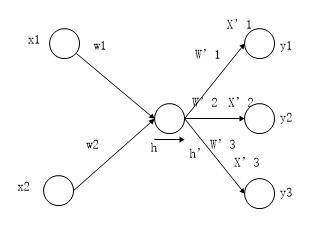

激活函数：  

我们选择tanh函数（反双曲正切变换函数）作为激活函数。它是一类S型函数（sigmod function），所以该类型的函数都会呈现S形状。神经网络几乎总是利用s型函数来计算神经元的输出。 

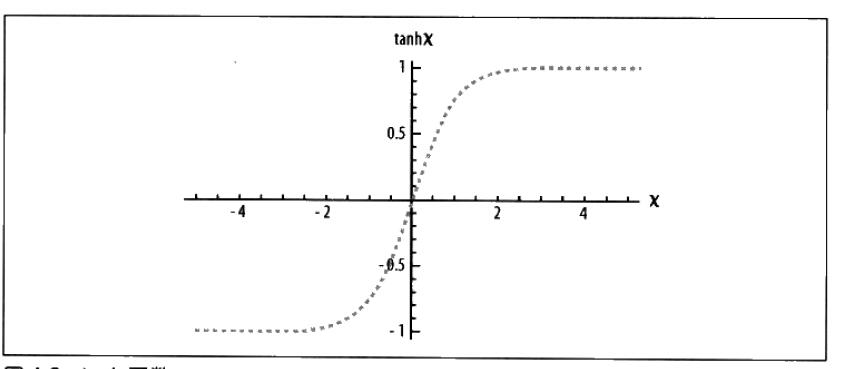

In [7]:
def getallhiddenids(self,wordids,urlids):
    L1 = {}
    for wordid in wordids:
        cur = self.con.execute(
        "select toid from wordhidden where fromid=%d" %wordid)
        for row in cur:L1[row[0]] = 1
    for urlid in urlids:
        cur = self.con.execute(
        "select fromid from hiddenurl where toid=%d" %urlid)
        for row in cur:L1[row[0]] = 1
    return L1.keys()

我们还需要一个方法，利用数据库中保存的信息，建立起包括所有当前权重值在内的相应网络。该函数为searcher类定义了多个实例变量。包括：单词列表、查询节点、及URL，
每个节点的输出级别，以及每个节点间连接的权重值。权重值来自先前数据库

In [8]:
def setupnetwork(self,wordids,urlids):
    #值列表
    self.wordids = wordids
    self.hiddenids = self.getallhiddenids(wordids,urlids)
    self.urlids = urlids
    
    #节点输出
    self.ai = [1.0]*len(self.wordids)
    self.ah = [1.0]*len(self.hiddenids)
    self.ao = [1.0]*len(self.urlids)
    
    #建立权重矩阵
    self.wi = [[self.getstrength(wordid,hiddenid,0) \
               for hiddenid in self.hiddenids] \
              for wordid in self.wordids]
    
    self.wo = [[self.getstrength(hiddenid,urlid,1) \
               for urlid in self.urlids] \
              for hiddenid in self.hiddenids]

最后来构造前馈算法。  
前向传播其实就是根据这个网络拓扑图，直接计算出结果来而已。

x'1=h′∗w′1 , X′2=h′∗w′2 , X′3=h′∗w′3

In [43]:
def feedforward(self):
    #查询单词是仅有的输入
    for i in range(len(self.wordids)):
        self.ai[i] = 1.0
        
    #隐藏层节点的活跃程度
    for j in range(len(self.hiddenids)):
        sum = 0.0
        for i in range(len(self.wordids)):
            sum = sum + self.ai[i]*self.wi[i][j]
        self.ah[j] = tanh(sum)
        
    #输出层节点的活跃程度
    for k in range(len(self.urlids)):
        sum = 0.0
        for j in range(len(self.hiddenids)):
            sum = sum + self.ah[j]*self.wo[j][k]
        self.ao[k] = tanh(sum)
    return self.ao[:]

接下来，我们可以编写一个简短的函数，建立神经网络 。

In [11]:
def getresult(self,wordids,urlids):
    self.setupnetwork(wordids,urlids)
    return self.feedforward()

In [17]:
mynet = searchnet("nn.db")
mynet.getresult([wWorld,wBank],[uWorldBank,uRiver,uEarth])

[0.046178848412416734, 0.046178848412416734, 0.046178848412416734]

因为未经过训练，所以所有的输出结果都一样

## 反向传播进行训练

 这里其实就是利用梯度下降发不断更新图6-2中的权值w的过程：


求能使Y最小的参数w的值。本来可以用最小二乘法，也就是  

∂Y/∂w=0=>w

但是，当网络很大，有上千个参数，直接求解析解有时候不现实，所以我们用梯度下降法来求数值解。 
第一步：输入搜索内容(x1,x2)，相关urls以及最后用户点击的url(target (y∗1,y∗2,y∗3))。 
第二步：根据(x1,x2),w计算出输出(y1,y2,y3) 
第三步:求(y1,y2,y3)和target(y∗1,y∗2,y∗3))越不同，cost function：Y的值越大，为了缩小这个Y值，我们求δ=∂Y∂w, 这个δ就是梯度，当Y对某个w的梯度大于零，表示w增加的话，损失函数Y的值也会增加。所以当梯度大于零的时候，w的值应该减小，来使损失函数的值也变小。那么到底应该减少多少呢？这就是一个经验值了，这里减少0.5∗δ。 
第四步：w=w−0.5∗δ 
第五步:如果没有收敛就返回第一步，否则结束。 
*hidden-output层的权重更新：* 

tips:[tanh(x)]′=1−[tanh(x)]2

*input-hidden层的权重更新：* 

这两层权重更新对应的代码如下：

In [19]:
#计算tanh函数斜率变化，输出为零时，只改变一点点，输入便会获得很大变化，输出为1则相反
def dtanh(y):
    return 1.0-y*y

def backPropagate(self,targets,N=0.5):
    #计算输出层误差
    output_deltas = [0.0] * len(self.urlids)
    for k in range(len(self.urlids)):
        error = targets[k] - self.ao[k]
        output_deltas[k] = dtanh(self.ao[k])*error
        
    #计算隐藏层误差
    hidden_deltas = [0.0] * len(self.hiddenids)
    for j in range(len(self.hiddenids)):
        error = 0.0
        for k in range(len(self.urlids)):
            error = error + output_deltas[k]*self.wo[j][k]
        hidden_deltas[j] = dtanh(self.ah[j]) * error
    
    #更新输出权重
    for j in range(len(self.hiddenids)):
        for k in range(len(self.urlids)):
            change = output_deltas[k]*self.ah[j]
            self.wo[j][k] = self.wo[j][k] + N*change
            
    #更新输入weights
    for i in range(len(self.wordids)):
        for k in range(len(self.urlids)):
            change = hiddden_deltas[j] * self.ai[i]
            self.wi[i][j] = self.wi[i][j] + N*change

接下来，编写一个简单函数，建立神经网络，运行前馈和反向传播算法

In [21]:
def trainquery(self,wordids,urlids,selectedurl):
    #如有必要，生成一个隐藏节点
    self.generatehiddennode(wordids,urlids)
    self.setupnetwork(wordids,urlids)
    self.feedforward()
    targets = [0.0]*len(urlids)
    targets[urlids.index(selectedurl)] = 1.0
    self.backPropagate(targets)
    self.updatedatabase()

·为了保存结果，还需要一个方法更新数据库权重值，权重信息位于实例wi和wo中

In [23]:
def updatedatabase(self):
    #将值存入数据库中
    for i in range(len(self.wordids)):
        for j in range(len(self.hiddenids)):
            self.setstrength(self.wordids[i],self.hiddenids[j],0,self.wi[i][j])
    for j in range (len(self.hiddenids)):
        for k in range(len(self.urlids)):
            self.setstrength(self.hiddenids[j],self.urlids[k],1,self.wo[j][k])
    self.con.commit()

In [37]:
mynet = searchnet("nn.db")
mynet.trainquery([wWorld,wBank],[uWorldBank,uRiver,uEarth],uWorldBank)

TypeError: 'dict_keys' object does not support indexing

9.TypeError: ‘dict_keys’ object does not support indexing

这个问题是python版本的问题

    

#如果使用的是python2
firstStr = myTree.keys()[0]
#LZ使用的是python3
firstSides = list(myTree.keys())
firstStr = firstSides[0]

    
这是看决策树代码出现的问题，python3如果运行

   

firstStr = myTree.keys()[0]

   

就会报这个错误，解决办法就是先转换成list，再把需要的索引提取出来。

In [46]:
mynet = searchnet("nn.db")
mynet.trainquery([wWorld,wBank],[uWorldBank,uRiver,uEarth],uWorldBank)

In [47]:
mynet.getresult([wWorld,wBank],[uWorldBank,uRiver,uEarth])

[0.6427962713230368, 0.07128904780144368, 0.021737361538321107]

接下来展示神经网络的威力，对以前未曾见过的输入请况进行推理

In [48]:
allurls=[uWorldBank,uRiver,uEarth]
for i in range(30):
    mynet.trainquery([wWorld,wBank],allurls,uWorldBank)
    mynet.trainquery([wRiver,wBank],allurls,uRiver)
    mynet.trainquery([wWorld],allurls,uEarth)

In [49]:
print (mynet.getresult([wWorld,wBank],allurls))
print (mynet.getresult([wRiver,wBank],allurls))
print(mynet.getresult([wBank],allurls))


[0.6684652274011189, 0.13232366534133091, 0.145294501077158]
[0.07434717450924458, 0.7703824683869828, -0.07112781662848906]
[0.23847121496172818, 0.7307894853667976, 0.07562181551684054]


模型对world bank url 评价比 riverurl 的高

与搜索引擎结合

将下列代码加入searchengine中的query方法中

In [51]:
return wordids,[r[1] for r in rankedscores[1:10]]

SyntaxError: 'return' outside function (<ipython-input-51-fa0e230bb07f>, line 1)

在searchengine中引入神经网络的类


In [ ]:
mynet = searchnet('nn.db')


In [ ]:
然后在searcher类中加入下列方法

In [ ]:
def nnscore(self,rows,wordids):
    #获得一个由唯一的URL ID构成的有序列表、
    urlids = [urlid for urlid in set([row[0] for row in rows])]
    nnres = mynet.getresult(wordids,urlids)
    scores = dict([(urlids[i],nnres[i]) for i in range(len(urlids))])
    return self.normalizescores(scores)